# イベントドリブンプログラミング
マウスクリック、マウスオーバーなど操作を行う（イベントを発生させる）と、予めそれぞれの操作に応じて定義した
関数を実行する。
以下のリンクから「マウスクリックで点を描画する」のコードを入力して結果を確認してください。
https://mori-memo.hateblo.jp/entry/2022/02/09/224642  

- イベントの紐づけに共通するのは、イベント発生時に呼ばれる関数を定義して、それをfigureに紐づけること。この
コーディングでは、def onclick(event):がその関数に相当
- この関数の引数にeventを入れておくことで、イベントのクラス変数を呼び出すことができる。このコーデイングでは
event.xdata, event.ydataで、クラス変数x,y座標を呼び出している。  

- ln, = ax.plot([],[],'o')は、本来折れ線グラフのメソッドだが、[],[]なのでデータが空のグラフを意味する
- ln.set_data(x,y)は、この空のグラフにデータを与えるもの。ただし,x,yは点なので、折れ線グラフが点になる。なので
これを連続的にプロットすると折れ線になる。以下リンクの”Animationでlinesの値だけを変える”を参照。
https://qiita.com/ceptree/items/5fb5e9e6f29d214153c9
- %matplotlib notebookはjupyterでイベントドリブンプログラミングを動かすためのおまじないみたいなもの（コマンドラインから実行
する場合は、不要）

動作を確認出来たら、「カーソルを表示する」を入力して動かしてください（コピペでもよいです）  
https://mori-memo.hateblo.jp/entry/2022/02/09/224642  
イベントとして、クリックだけでなてカーソル移動が加わっている。


<IPython.core.display.Javascript object>


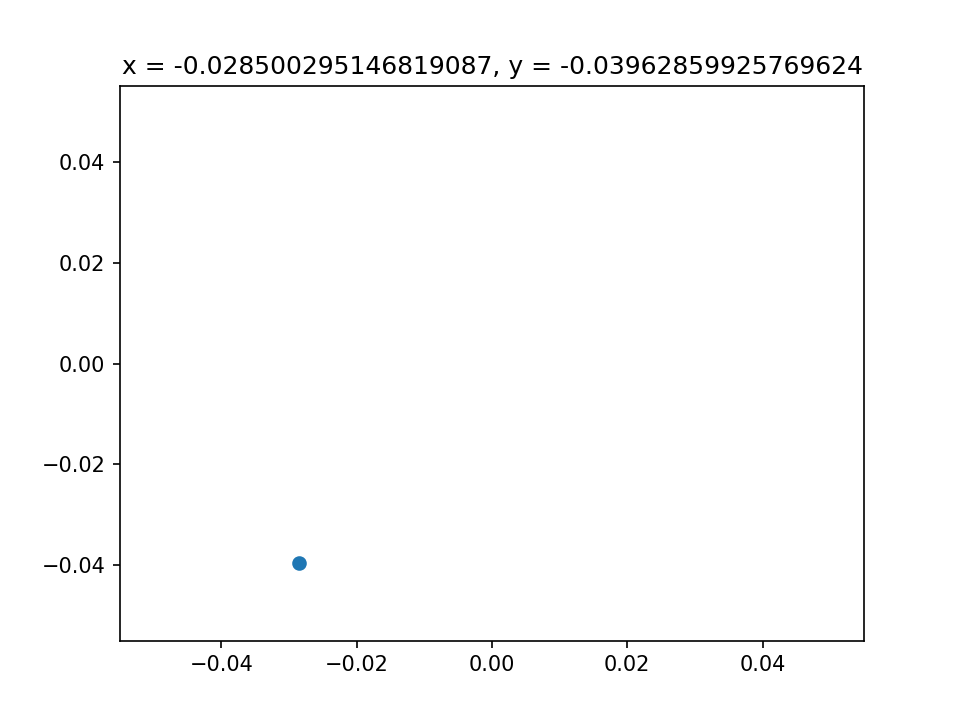

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ln, = ax.plot([],[],'o')

def onclick(event):
    
    x = event.xdata
    y = event.ydata
    
    ln.set_data(x,y)
    ax.set_title('x = {}, y = {}'.format(event.xdata, event.ydata))
    plt.draw()

fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

<IPython.core.display.Javascript object>


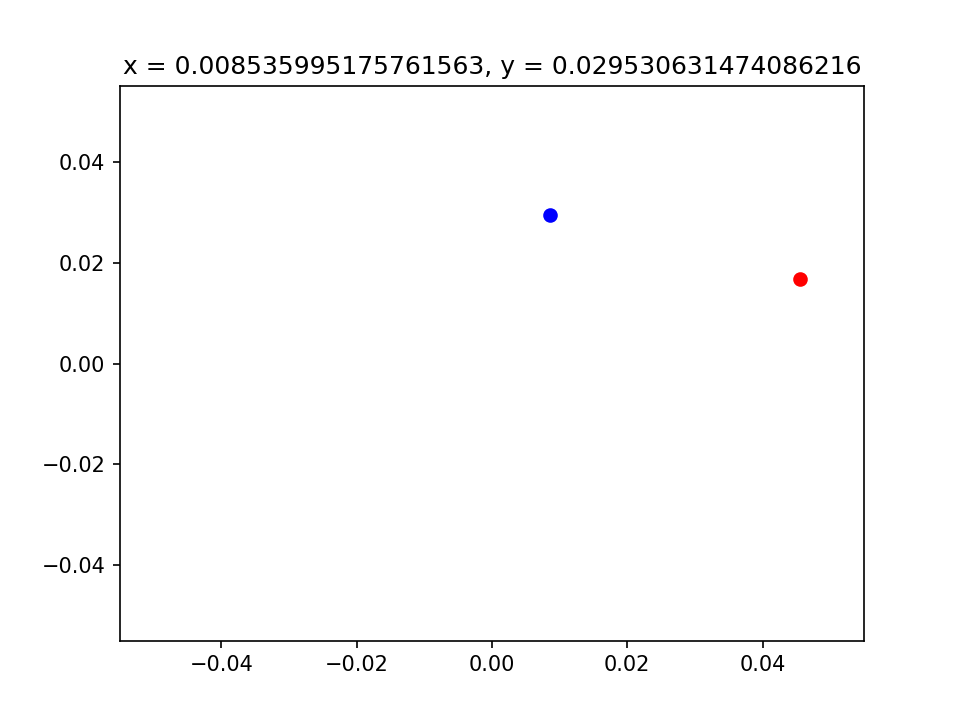

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ln, = ax.plot([],[],'bo')
cur, = ax.plot([],[],'ro')

def motion(event):
    x = event.xdata
    y = event.ydata

    cur.set_data(x,y)
    plt.draw()

def onclick(event):
    x = event.xdata
    y = event.ydata

    ln.set_data(x,y)
    ax.set_title('x = {}, y = {}'.format(event.xdata, event.ydata))
    plt.draw()

fig.canvas.mpl_connect('button_press_event', onclick)
fig.canvas.mpl_connect('motion_notify_event', motion)
plt.show()

## クリックするとピクトグラムを表示する  
上記のmotion_notify_eventプログラムを参考にして、前回のwoman.pngのピクトグラムにカーソルを当てるとピンク色で
塗りつぶすプログラムを書いてください。

<IPython.core.display.Javascript object>


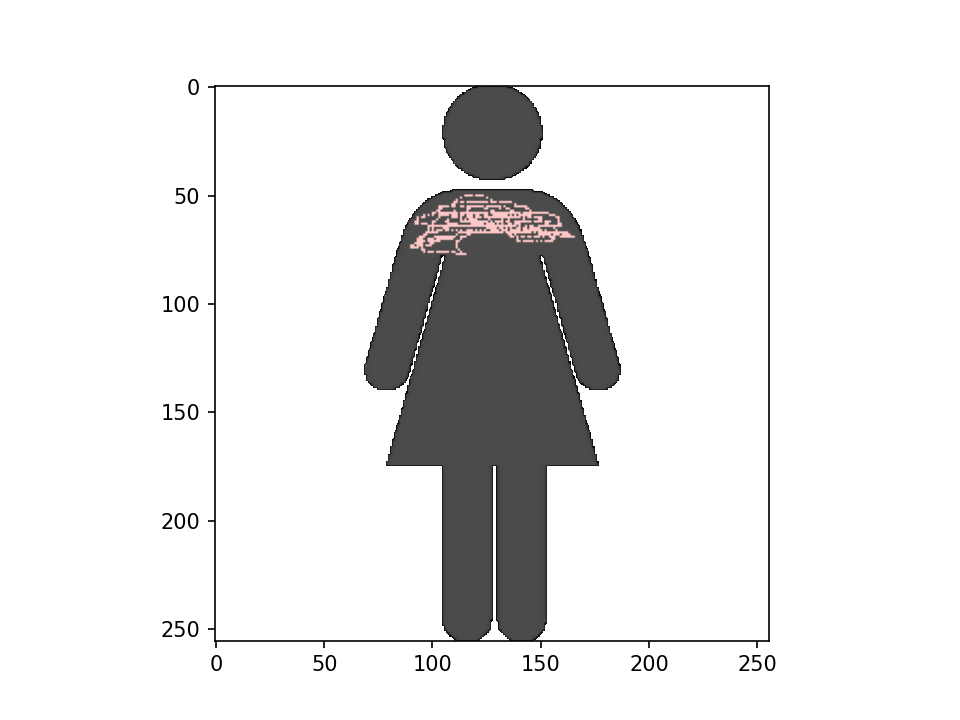

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
from IPython.display import display


fig, ax = plt.subplots()


def fill(event):
    
    x = int(event.xdata)
    y = int(event.ydata)
    if im.getpixel((x,y))[3] != 0:
        im.putpixel((x,y), (255,200,200))
    
        ax.imshow(im)
        plt.draw()
        
    

im = Image.open('woman.png')
fig.canvas.mpl_connect('motion_notify_event',fill)
ax.imshow(im)
plt.show()


## クリックイベントで文字情報を重ねる
以前こんなグラフを描きました。月別、texture/flavor 別にラーメン','蕎麦','うどん'の出現頻度をグラフにしたもの。
実際にfortravel_flavor_texture.csvの中身を見ると、これ以外に多くの単語が並んでいる。これを全部グラフで重ね
併せると、ごちゃごちゃになるだけ。

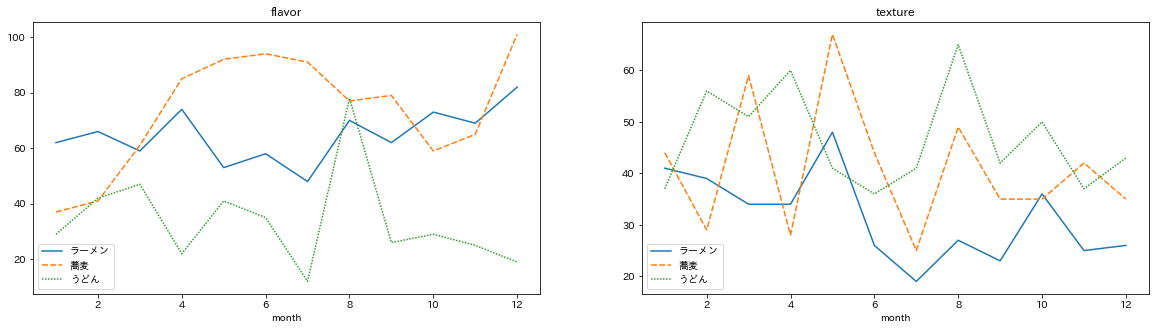

In [1]:
import datetime
from matplotlib import pyplot as plt
import japanize_matplotlib
import pandas as pd
import seaborn as sns

fortravel = pd.read_csv('fortravel_flavor_texture.csv',header = 0 ,encoding='cp932', parse_dates=['date'])
fortravel['month'] = fortravel['date'].dt.month

fig, axes = plt.subplots(1,2, figsize=(20,5))

flavor = fortravel[fortravel['keyword']=='flavor']
flavor_season = flavor.groupby('month').sum()
sns.lineplot(data=flavor_season[['ラーメン','蕎麦','うどん']],ax=axes[0])
axes[0].legend(loc='lower left')
axes[0].set_title("flavor")

texture = fortravel[fortravel['keyword']=='texture']
texture_season = texture.groupby('month').sum()
sns.lineplot(data=texture_season[['ラーメン','蕎麦','うどん']],ax=axes[1])
axes[1].legend(loc='lower left')
axes[1].set_title("texture")

plt.xticks()
plt.show()

## 全ての単語の月別頻度をグラフにする
以下コーディングのポイント
- fortravel['total'] = fortravel.iloc[:,18:].sum(axis=1) : 行毎合計を計算して['total']カラムに追加する
- fortravel['date'] = fortravel['date'].dt.month: 年月日を月だけにして['date']カラムを更新
- flavor_season = flavor.groupby('date').sum() : flavor dataframeを月別に小計する

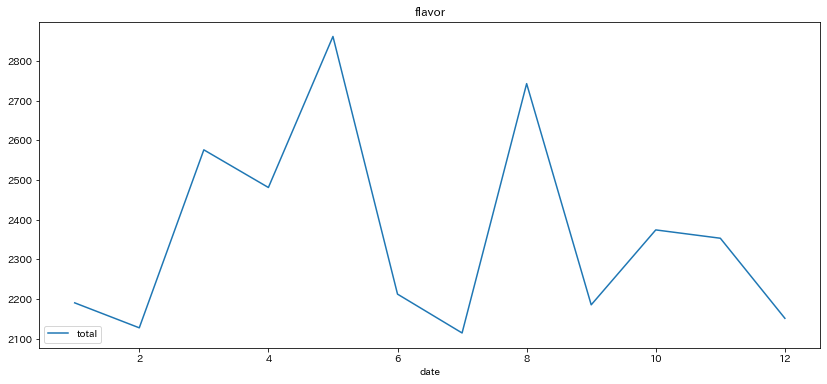

In [2]:
fortravel = pd.read_csv('fortravel_flavor_texture.csv',header = 0 ,encoding='cp932', parse_dates=['date'])
fortravel['total'] = fortravel.iloc[:,18:].sum(axis=1)
fortravel['date'] = fortravel['date'].dt.month

fig = plt.figure(figsize=(14, 6))
axes = fig.add_subplot(1, 1, 1)
flavor = fortravel[fortravel['keyword']=='flavor']

flavor_season = flavor.groupby('date').sum()
sns.lineplot(data=flavor_season[['total']],ax=axes)
axes.legend(loc='lower left')
axes.set_title("flavor")



plt.xticks()
plt.show()

## 単語の月別小計のみdataframeに抽出
- flavor_season_words = flavor_season.iloc[:,18:-1] flavor_season には、単語以外の情報も含まれている（試しに表示してみる）。
- -1 は、最後のカラムを意味する（最後のカラムとは何を意味するか？）

In [3]:
flavor_season_words = flavor_season.iloc[:,18:-1]
flavor_season_words

,綺麗,タレ,定食,柔らかく,肉,ケーキ,コーヒー,カウンター,カフェ,ソフトクリーム,...,出汁,和菓子,アイス,海老,甘い,素材,焼き菓子,濃い,柔らかい,不思議
date,,,,,,,,,,,,,,,,,,,,,
1,9,4,22,13,34,30,26,42,28,4,...,39,18,3,45,8,10,15,15,5,0
2,7,3,23,20,36,59,23,26,26,16,...,14,15,15,40,16,12,5,7,5,5
3,7,8,15,11,21,80,24,39,32,18,...,22,25,12,28,19,13,26,7,9,9
4,16,11,22,9,16,49,27,28,22,25,...,19,18,14,9,10,19,19,12,8,7
5,11,13,10,8,20,72,31,32,32,66,...,22,24,8,14,19,13,16,12,7,10
6,11,10,17,13,30,49,22,27,26,38,...,21,12,19,30,15,11,18,8,4,6
7,11,2,19,8,30,36,23,26,26,18,...,9,9,11,17,7,9,13,12,5,6
8,12,6,30,7,22,49,39,43,35,47,...,27,9,18,12,14,15,7,14,9,6
9,14,7,27,11,25,30,18,28,28,31,...,20,14,20,12,12,12,9,13,3,4


## 折れ線グラフのイベントドリブン
イベントドリブンプログラミングの構造は以下。
- fig.canvas.mpl_connect('button_press_event', on_button_press) イベントを待ち続ける関数。イベントを検出するとon_button_press
で定義される関数を動作させる。
- def on_button_press( event): イベント発生の都度動作する関数。eventは、発生したイベントのオブジェクト
- event.xdata　event.ydata eventの属性の１つ。イベントが発生した座標位置（座標は、matplotlibで定義したx,y軸目盛りに従う。ここでは
sns.lineplot(data=flavor_season[['total']],ax=axes)）

### プログラミングの概要
以下のコーディングは、マウスクリックイベントの発生を検知して、クリック座標位置に、該当の月の単語頻度の大きい順に5つ表示するもの。
- axes.text(x,y,text, size=10) グラフ座標x,y上に文字列変数textを表示するメソッド
- plt.clf() グラフをオールクリア。前回のクリックで表示した単語頻度を消してから、新たなクリック位置の単語頻度を表示するためのもの
    もしこれを省略すると、クリックのたびに単語表示が増えていく（試しにこれをコメントアウトするとわかります）
- 以上を踏まえて、以下のコーディングは何をやっているかを考えてみてください。  
    
    word_vec = flavor_season_words.iloc[int(event.xdata),:]  
    word_vec = word_vec.sort_values(ascending=False)  
    text = word_vec[:5].index.tolist()  
    text = ','.join(text)  


<IPython.core.display.Javascript object>


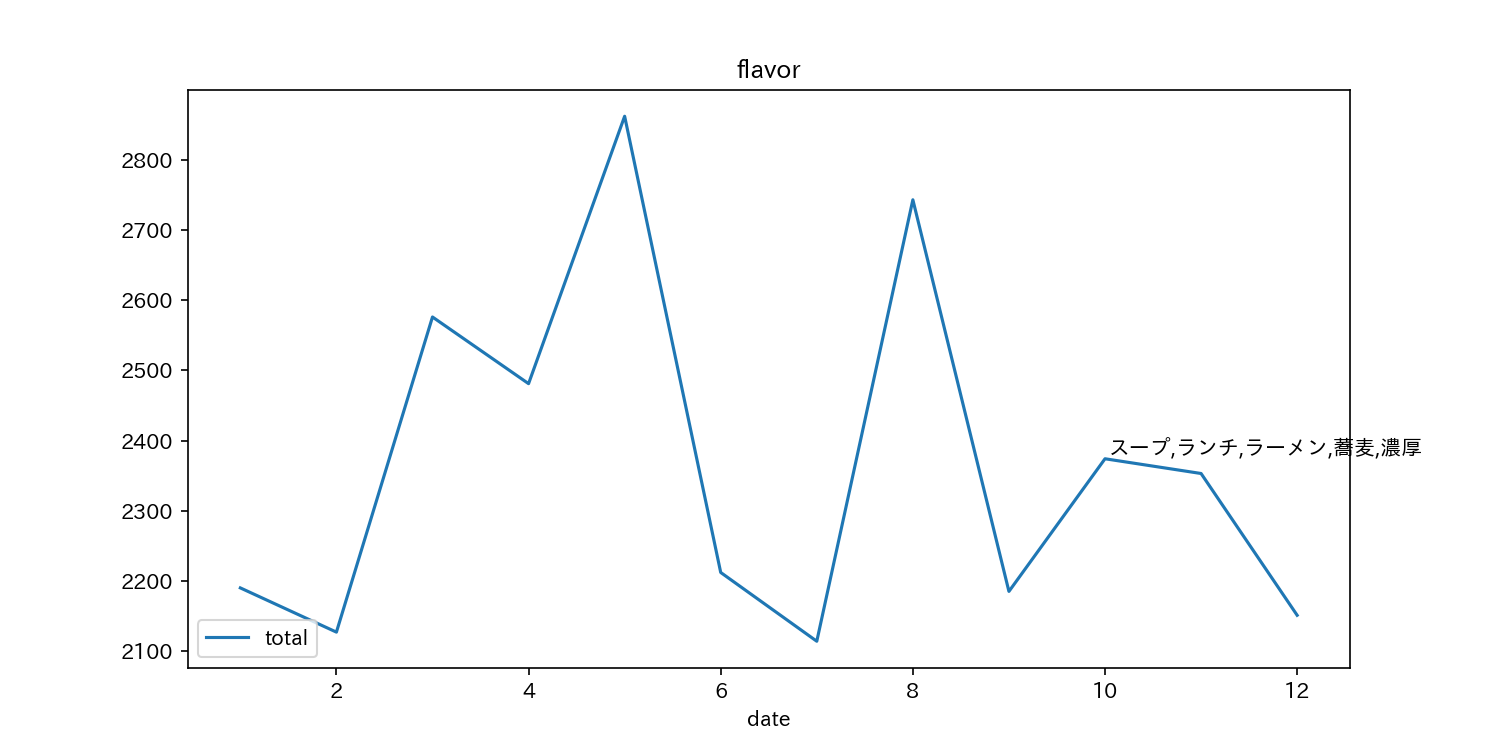

In [6]:
%matplotlib notebook
# jupyter上でインタラクティブを動作するための設定
# https://www.web-dev-qa-db-ja.com/ja/python/jupyter%E3%83%8E%E3%83%BC%E3%83%88%E3%83%96%E3%83%83%E3%82%AF%E3%81%AEcanvasmplconnect/832236413/
def on_button_press( event):
    
    print(event.xdata)
    

    word_vec = flavor_season_words.iloc[int(event.xdata),:]
    word_vec = word_vec.sort_values(ascending=False)
    text = word_vec[:5].index.tolist()
    text = ','.join(text)
    print(text)
    
    
    plt.clf()    
    
    axes = fig.add_subplot(1, 1, 1)
    sns.lineplot(data=flavor_season[['total']],ax=axes)
    
    axes.text(float(event.xdata), float(event.ydata),text, size=10)
    axes.legend(loc='lower left')
    axes.set_title("flavor")

    plt.xticks()
    plt.draw()
    #plt.pause(1)

fig = plt.figure(figsize=(10,5))
axes = fig.add_subplot(1, 1, 1)

sns.lineplot(data=flavor_season[['total']],ax=axes)
fig.canvas.mpl_connect('button_press_event', on_button_press)
axes.legend(loc='lower left')
axes.set_title("flavor")

plt.xticks()
plt.show()

## 演習問題
上記のグラフと同様なイベントドリブンプログラムを、textureグラフについて表示してみてください。

## イベントドリブンプログラミングを使った研究例
スライドを見てください。  

プログラムは  
C:\Users\uhoku\Dropbox\Python\economic_timiSeries\crypto_currency  
plot_topicPca_modeSignal.py  
頻度時系列は  
plot_tweet_freq2.py  

を実行。詳細はevernote 'python 経済時系列のtwitter' ->'トピック第一主成分のcontribution ratio時系列 modeSignalとの比較'    
を参照。